In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
client_data = pd.read_csv("train.csv")
client_data_test = pd.read_csv("test.csv")
client_data

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,...,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,Yes,Yes,67,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,1,Female,0,No,No,34,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,2,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,3,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,4,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,3586,Female,0,No,No,5,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,80.20,384.25,False
3587,3587,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),77.55,5574.35,False
3588,3588,Female,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,One year,No,Credit card (automatic),86.45,5762.95,False
3589,3589,Female,0,Yes,Yes,12,Yes,No,DSL,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),58.35,740.55,False


In [3]:
n = 0
for x in client_data['TotalCharges']:
    if x == ' ':
        n += 1
n

6

In [4]:
n = 0
for x in client_data_test['TotalCharges']:
    if x == ' ':
        n += 1
n

4

In [5]:
client_data = client_data.replace(' ', np.NaN)
client_data['TotalCharges'] = client_data['TotalCharges'].fillna(client_data['TotalCharges'].mode().max())

In [6]:
n = 0
for x in client_data['TotalCharges']:
    if x == ' ':
        n += 1
n

0

In [7]:
client_data_test = client_data_test.replace(' ', np.NaN)
client_data_test['TotalCharges'] = client_data_test['TotalCharges'].fillna(client_data_test['TotalCharges'].mode().max())

In [8]:
n = 0
for x in client_data_test['TotalCharges']:
    if x == ' ':
        n += 1
n

0

In [9]:
client_data['TotalCharges'] = pd.to_numeric(client_data['TotalCharges'])
client_data_test['TotalCharges'] = pd.to_numeric(client_data_test['TotalCharges'])

In [10]:
client_data = client_data.replace('No phone service', 'No').replace('No internet service', 'No')
client_data['Married'] = client_data.Married.map(dict(Yes=1, No=0))
client_data['Dependents'] = client_data.Dependents.map(dict(Yes=1, No=0))
client_data['Phone'] = client_data.Phone.map(dict(Yes=1, No=0))
client_data['MultiplePhones'] = client_data.MultiplePhones.map(dict(Yes=1, No=0))
client_data['Security'] = client_data.Security.map(dict(Yes=1, No=0))
client_data['Insurance'] = client_data.Insurance.map(dict(Yes=1, No=0))
client_data['Support'] = client_data.Support.map(dict(Yes=1, No=0))
client_data['TV'] = client_data.TV.map(dict(Yes=1, No=0))
client_data['Movies'] = client_data.Movies.map(dict(Yes=1, No=0))
client_data['EBilling'] = client_data.EBilling.map(dict(Yes=1, No=0))
client_data['Backup'] = client_data.Backup.map(dict(Yes=1, No=0))
client_data

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,...,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,1,1,67,0,0,DSL,1,...,1,1,1,0,Two year,0,Credit card (automatic),54.20,3623.95,False
1,1,Female,0,0,0,34,1,1,DSL,1,...,0,1,0,0,One year,1,Mailed check,64.40,2088.75,True
2,2,Female,1,1,0,72,1,1,Fiber optic,1,...,1,1,0,0,Two year,1,Bank transfer (automatic),96.60,6827.50,False
3,3,Female,0,1,1,63,1,0,DSL,1,...,1,1,0,0,Two year,0,Mailed check,63.55,4014.20,False
4,4,Male,0,1,1,69,1,1,Fiber optic,0,...,1,0,1,0,One year,0,Credit card (automatic),95.75,6511.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,3586,Female,0,0,0,5,1,0,Fiber optic,0,...,0,0,1,0,Month-to-month,0,Electronic check,80.20,384.25,False
3587,3587,Female,0,1,1,71,1,0,DSL,1,...,1,0,1,1,Two year,0,Credit card (automatic),77.55,5574.35,False
3588,3588,Female,0,1,0,68,1,1,Fiber optic,0,...,1,0,0,0,One year,0,Credit card (automatic),86.45,5762.95,False
3589,3589,Female,0,1,1,12,1,0,DSL,0,...,1,0,1,0,Month-to-month,1,Credit card (automatic),58.35,740.55,False


In [11]:
client_data_test = client_data_test.replace('No phone service', 'No').replace('No internet service', 'No')
client_data_test['Married'] = client_data_test.Married.map(dict(Yes=1, No=0))
client_data_test['Dependents'] = client_data_test.Dependents.map(dict(Yes=1, No=0))
client_data_test['Phone'] = client_data_test.Phone.map(dict(Yes=1, No=0))
client_data_test['MultiplePhones'] = client_data_test.MultiplePhones.map(dict(Yes=1, No=0))
client_data_test['Security'] = client_data_test.Security.map(dict(Yes=1, No=0))
client_data_test['Insurance'] = client_data_test.Insurance.map(dict(Yes=1, No=0))
client_data_test['Support'] = client_data_test.Support.map(dict(Yes=1, No=0))
client_data_test['TV'] = client_data_test.TV.map(dict(Yes=1, No=0))
client_data_test['Movies'] = client_data_test.Movies.map(dict(Yes=1, No=0))
client_data_test['EBilling'] = client_data_test.EBilling.map(dict(Yes=1, No=0))
client_data_test['Backup'] = client_data_test.Backup.map(dict(Yes=1, No=0))
client_data_test

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Male,0,0,0,58,1,0,Fiber optic,1,1,0,0,1,1,One year,0,Bank transfer (automatic),99.15,5720.95
1,1,Female,0,1,1,26,1,0,Fiber optic,0,0,0,0,1,1,Month-to-month,1,Electronic check,90.80,2361.80
2,2,Female,0,0,0,26,1,0,Fiber optic,1,0,1,1,0,0,One year,1,Credit card (automatic),87.15,2274.10
3,3,Male,0,0,0,12,1,1,DSL,1,1,0,1,0,0,Month-to-month,1,Electronic check,67.25,832.30
4,4,Female,0,0,0,1,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,75.05,75.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,2390,Male,0,0,0,62,0,0,DSL,1,1,1,1,0,0,Two year,1,Bank transfer (automatic),43.70,2618.30
2391,2391,Female,0,1,0,2,1,0,No,0,0,0,0,0,0,Month-to-month,0,Bank transfer (automatic),20.10,43.15
2392,2392,Female,0,1,1,23,1,1,Fiber optic,0,0,0,0,1,0,Month-to-month,1,Electronic check,83.75,1849.95
2393,2393,Male,1,1,0,53,1,1,Fiber optic,0,1,0,0,1,1,Month-to-month,1,Electronic check,101.90,5549.40


In [12]:
client_data = pd.get_dummies(client_data)
client_data

,Index,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Security,Backup,Insurance,...,Internet_DSL,Internet_Fiber optic,Internet_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,67,0,0,1,1,1,...,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,34,1,1,1,1,0,...,1,0,0,0,1,0,0,0,0,1
2,2,1,1,0,72,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
3,3,0,1,1,63,1,0,1,1,1,...,1,0,0,0,0,1,0,0,0,1
4,4,0,1,1,69,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,3586,0,0,0,5,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3587,3587,0,1,1,71,1,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
3588,3588,0,1,0,68,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
3589,3589,0,1,1,12,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0


In [13]:
client_data_test = pd.get_dummies(client_data_test)
client_data_test

,Index,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Security,Backup,Insurance,...,Internet_DSL,Internet_Fiber optic,Internet_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,58,1,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0
1,1,0,1,1,26,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,2,0,0,0,26,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
3,3,0,0,0,12,1,1,1,1,0,...,1,0,0,1,0,0,0,0,1,0
4,4,0,0,0,1,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,2390,0,0,0,62,0,0,1,1,1,...,1,0,0,0,0,1,1,0,0,0
2391,2391,0,1,0,2,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2392,2392,0,1,1,23,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2393,2393,1,1,0,53,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [14]:
X = client_data.drop(['Churn'], axis=1)
Y = client_data['Churn']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
#X_train = X
#Y_train = Y
#X_test = client_data_test

In [16]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', max_iter = 1000)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
#predictions = (predictions < 0.5).astype(int)

In [23]:
count = 0
count_all = 0
unmatched = set()
for p, y in zip(predictions, Y_test):
    count_all = count_all + 1
    if p == y:
        count = count + 1
    else:
        unmatched.add(count_all)
count/count_all

0.7927677329624478

Text(0, 0.5, 'Target')

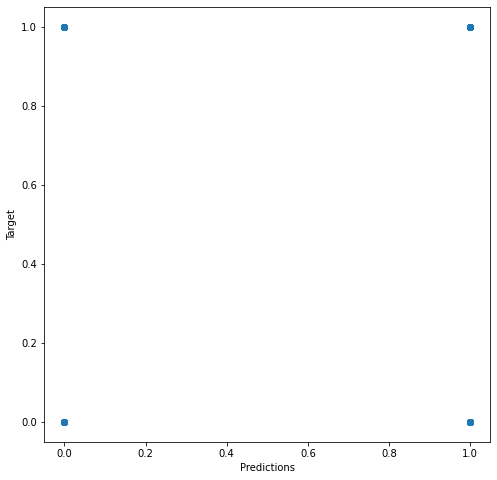

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [20]:
predictions.size

719

final_data = pd.read_csv("sample_submission.csv")
final_data['Churn'] = predictions
final_data

final_data.to_csv('out.csv', index=False)

In [21]:
weights = pd.Series(model.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

Internet_Fiber optic                       0.229774
TotalCharges                               0.182527
Contract_Month-to-month                    0.161270
EBilling                                   0.114987
MultiplePhones                             0.085712
PaymentMethod_Electronic check             0.085232
Movies                                     0.072021
TV                                         0.056153
Senior                                     0.035341
Married                                    0.024483
Index                                      0.014545
Gender_Female                              0.013052
Insurance                                  0.002326
Contract_One year                         -0.004122
Backup                                    -0.012387
Gender_Male                               -0.013052
PaymentMethod_Bank transfer (automatic)   -0.018957
Dependents                                -0.032864
PaymentMethod_Mailed check                -0.037882
PaymentMetho

In [ ]:
X_train = X
Y_train = Y
X_test = client_data_test